In [1]:
#IMPORT PACKAGES
from fbprophet import Prophet
import seaborn as sns
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
#IMPORT DATASET
fd=sns.load_dataset('flights')
fd.to_csv('flights.csv')
fd.head()
fd.tail()
fd.shape
fd.describe()
fd.info()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


(144, 3)

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [0]:
fd_pivot=fd.pivot('month','year','passengers')
fd_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


<Figure size 1080x720 with 0 Axes>

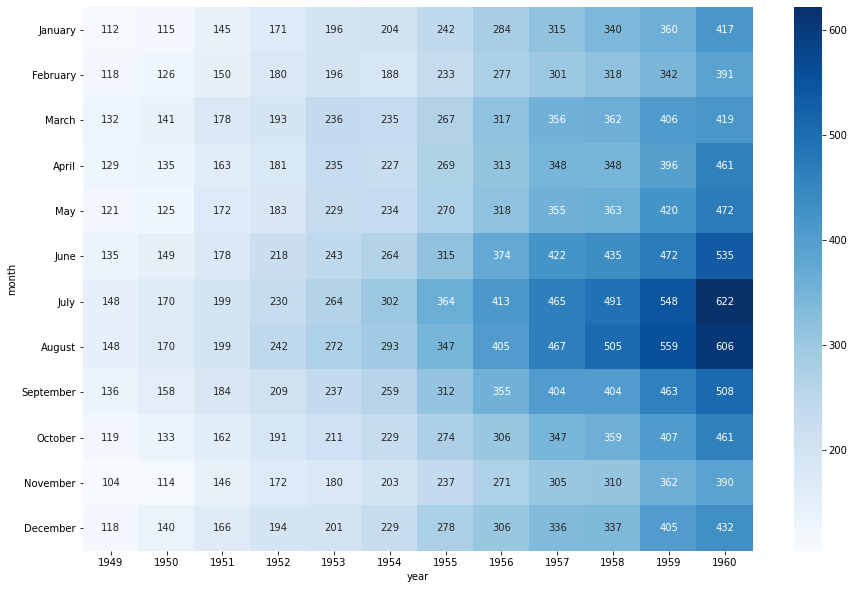

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(fd_pivot,annot=True,fmt= "d",cmap="Blues")
plt.show()

In [0]:
#SUBSET THE DATASET
fd=fd.loc[:,['passengers']]
fd.head()

,passengers
0,112
1,118
2,132
3,129
4,121


In [0]:
#DATA AS A TIMESTAMP IS NEEDED BY THE PACKAGES
months=pd.date_range('19490101',periods=144,freq='M')
months

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [0]:
fd['ds']=months
fd.head(5)
fd.tail(5)

,passengers,ds
0,112,1949-01-31
1,118,1949-02-28
2,132,1949-03-31
3,129,1949-04-30
4,121,1949-05-31


,passengers,ds
139,606,1960-08-31
140,508,1960-09-30
141,461,1960-10-31
142,390,1960-11-30
143,432,1960-12-31


In [0]:
fd.dtypes

passengers             int64
ds            datetime64[ns]
dtype: object

In [0]:
#RENAME THE COLUMNS AS REQUIRED BY THE PACKAGE.FIRST BUILD THE FORECASTING MODEL 
#WITHOUT DOING ANY TRANSFORMATION OF THE VARIABLE AND CHECK ACCURACY OF THE FORECAST
fd=fd.rename(columns={"passengers":"y"})

In [0]:
fd=fd.sort_index(axis=1)

In [0]:
fd.head(5)
fd.tail(5)

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


,ds,y
139,1960-08-31,606
140,1960-09-30,508
141,1960-10-31,461
142,1960-11-30,390
143,1960-12-31,432


In [0]:
#BUILD TIMESERIES MODEL
my_forecast=Prophet(interval_width=0.95)

In [0]:
my_forecast.fit(fd)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_periods=my_forecast.make_future_dataframe(periods=24,include_history=True,freq='M')
forecast_periods

,ds
0,1949-01-31
1,1949-02-28
2,1949-03-31
3,1949-04-30
4,1949-05-31
...,...
163,1962-08-31
164,1962-09-30
165,1962-10-31
166,1962-11-30


In [0]:
forecast=my_forecast.predict(forecast_periods)
forecast.head()
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-31,108.862763,42.182035,129.719599,108.862763,108.862763,-23.622490,-23.622490,-23.622490,-23.622490,-23.622490,-23.622490,0.0,0.0,0.0,85.240273
1,1949-02-28,110.806410,34.879402,121.490474,110.806410,110.806410,-33.220873,-33.220873,-33.220873,-33.220873,-33.220873,-33.220873,0.0,0.0,0.0,77.585537
2,1949-03-31,112.958305,67.375868,152.345047,112.958305,112.958305,-2.009923,-2.009923,-2.009923,-2.009923,-2.009923,-2.009923,0.0,0.0,0.0,110.948382
3,1949-04-30,115.040784,65.050830,150.433997,115.040784,115.040784,-6.493215,-6.493215,-6.493215,-6.493215,-6.493215,-6.493215,0.0,0.0,0.0,108.547569
4,1949-05-31,117.192679,67.895117,157.838595,117.192679,117.192679,-5.373415,-5.373415,-5.373415,-5.373415,-5.373415,-5.373415,0.0,0.0,0.0,111.819264


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
163,1962-08-31,547.400849,570.384741,657.352030,544.644812,549.692879,66.267978,66.267978,66.267978,66.267978,66.267978,66.267978,0.0,0.0,0.0,613.668827
164,1962-09-30,550.423059,518.872229,609.469113,547.462983,552.898032,15.328842,15.328842,15.328842,15.328842,15.328842,15.328842,0.0,0.0,0.0,565.751901
165,1962-10-31,553.546008,481.049412,574.674381,550.370808,556.186884,-23.553881,-23.553881,-23.553881,-23.553881,-23.553881,-23.553881,0.0,0.0,0.0,529.992127
166,1962-11-30,556.568218,451.536074,538.354578,553.192039,559.381592,-59.469181,-59.469181,-59.469181,-59.469181,-59.469181,-59.469181,0.0,0.0,0.0,497.099037
167,1962-12-31,559.691167,480.296883,573.956699,556.107311,562.684528,-33.000021,-33.000021,-33.000021,-33.000021,-33.000021,-33.000021,0.0,0.0,0.0,526.691146


In [0]:

forecast1=forecast.loc[:,['ds','yhat']]
forecast1.head(5)
forecast1.tail(5)

,ds,yhat
0,1949-01-31,85.240273
1,1949-02-28,77.585537
2,1949-03-31,110.948382
3,1949-04-30,108.547569
4,1949-05-31,111.819264


,ds,yhat
163,1962-08-31,613.668827
164,1962-09-30,565.751901
165,1962-10-31,529.992127
166,1962-11-30,497.099037
167,1962-12-31,526.691146


In [0]:
forecast1=forecast.loc[:,['ds','yhat','yhat_lower','yhat_upper']]
forecast1.head(5)
forecast1.tail(5)

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-31,85.240273,42.182035,129.719599
1,1949-02-28,77.585537,34.879402,121.490474
2,1949-03-31,110.948382,67.375868,152.345047
3,1949-04-30,108.547569,65.050830,150.433997
4,1949-05-31,111.819264,67.895117,157.838595


,ds,yhat,yhat_lower,yhat_upper
163,1962-08-31,613.668827,570.384741,657.352030
164,1962-09-30,565.751901,518.872229,609.469113
165,1962-10-31,529.992127,481.049412,574.674381
166,1962-11-30,497.099037,451.536074,538.354578
167,1962-12-31,526.691146,480.296883,573.956699


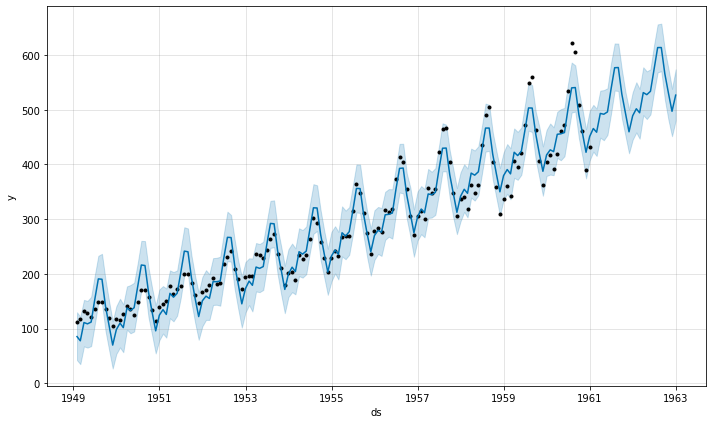

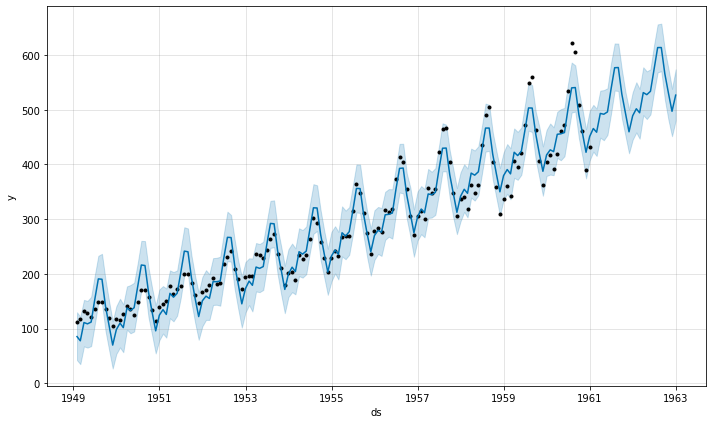

In [0]:
my_forecast.plot(forecast,uncertainty=True)
#dark blue points is actual data i.e. y
#dark blue line is the forecast that the model has made i.e. yhat
#shaded areas are the 95% confidence bound we have i.e. yhat_lower and yhat_upper
#we don't have dark blue points for 3 years i.e. 36 months for which we only have future dataframe i.e. yhat and we don't have y for that

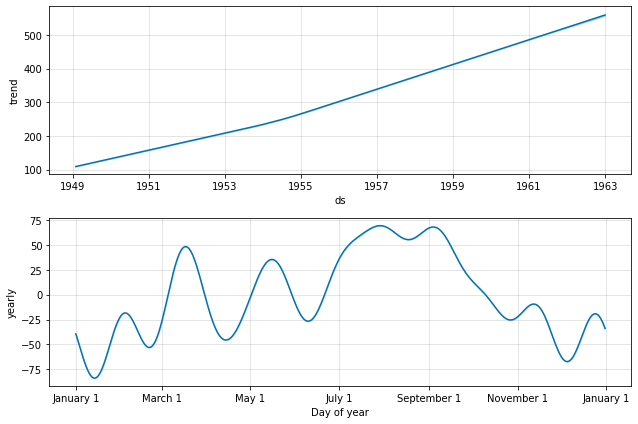

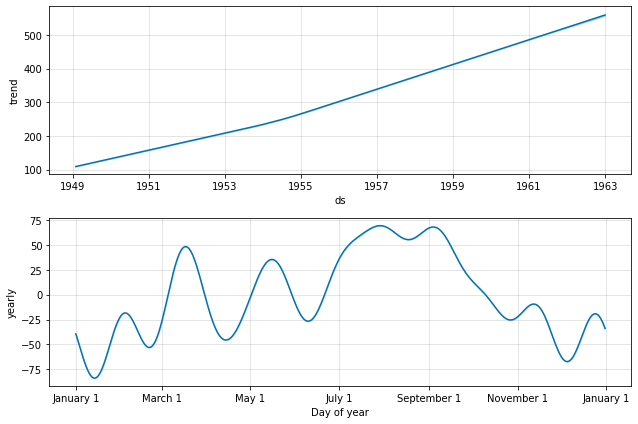

In [0]:
my_forecast.plot_components(forecast)
#here first figure display the trend and second figure display the seasonality factor

In [0]:
final_df=pd.merge(forecast1,fd,on='ds',how='inner')
final_df.head(5)
final_df.tail(5)

,ds,yhat,yhat_lower,yhat_upper,y
0,1949-01-31,85.240273,42.182035,129.719599,112
1,1949-02-28,77.585537,34.879402,121.490474,118
2,1949-03-31,110.948382,67.375868,152.345047,132
3,1949-04-30,108.547569,65.050830,150.433997,129
4,1949-05-31,111.819264,67.895117,157.838595,121


,ds,yhat,yhat_lower,yhat_upper,y
139,1960-08-31,540.544233,496.584707,581.053759,606
140,1960-09-30,491.385553,448.258093,534.349428,508
141,1960-10-31,456.968261,413.531960,500.586606,461
142,1960-11-30,422.179223,374.381610,464.246338,390
143,1960-12-31,451.106493,407.098934,497.702094,432


In [0]:
final_df['forecast_error']=np.abs(final_df['yhat']-final_df['y'])
final_df.head(5)
final_df.tail(5)

,ds,yhat,yhat_lower,yhat_upper,y,forecast_error
0,1949-01-31,85.240273,42.182035,129.719599,112,26.759727
1,1949-02-28,77.585537,34.879402,121.490474,118,40.414463
2,1949-03-31,110.948382,67.375868,152.345047,132,21.051618
3,1949-04-30,108.547569,65.050830,150.433997,129,20.452431
4,1949-05-31,111.819264,67.895117,157.838595,121,9.180736


,ds,yhat,yhat_lower,yhat_upper,y,forecast_error
139,1960-08-31,540.544233,496.584707,581.053759,606,65.455767
140,1960-09-30,491.385553,448.258093,534.349428,508,16.614447
141,1960-10-31,456.968261,413.531960,500.586606,461,4.031739
142,1960-11-30,422.179223,374.381610,464.246338,390,32.179223
143,1960-12-31,451.106493,407.098934,497.702094,432,19.106493


In [0]:
#COMPLETE ACCURACY OF THE FORECAST
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df.yhat,final_df.y),2)

17.3

In [0]:
np.round(metrics.median_absolute_error(final_df.yhat,final_df.y),2)

13.08

In [0]:
fd.head()
fd.tail()

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


,ds,y
139,1960-08-31,606
140,1960-09-30,508
141,1960-10-31,461
142,1960-11-30,390
143,1960-12-31,432


In [0]:
#LOG TRANSFORMATION
fd.y=np.log(fd.y)
fd.head(5)

,ds,y
0,1949-01-31,4.718499
1,1949-02-28,4.770685
2,1949-03-31,4.882802
3,1949-04-30,4.859812
4,1949-05-31,4.795791


In [0]:
#BUILD TIMESERIES MODEL
my_forecast=Prophet(interval_width=0.95)
my_forecast.fit(fd)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_periods=my_forecast.make_future_dataframe(periods=24,include_history=True,freq='M')
forecast_periods

,ds
0,1949-01-31
1,1949-02-28
2,1949-03-31
3,1949-04-30
4,1949-05-31
...,...
163,1962-08-31
164,1962-09-30
165,1962-10-31
166,1962-11-30


,ds,yhat
0,1949-01-31,4.710721
1,1949-02-28,4.709836
2,1949-03-31,4.834695
3,1949-04-30,4.816443
4,1949-05-31,4.815402


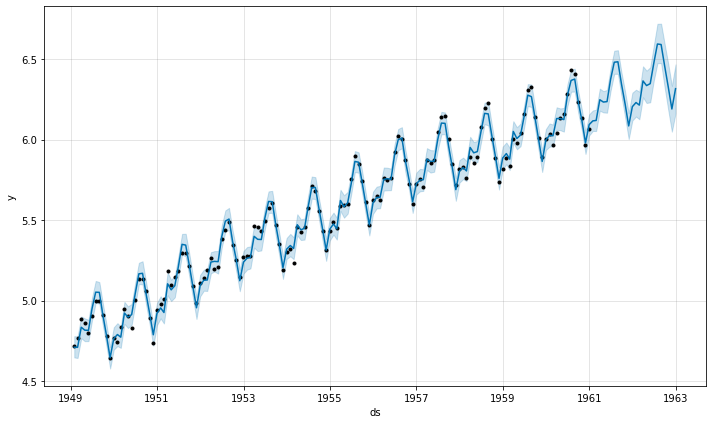

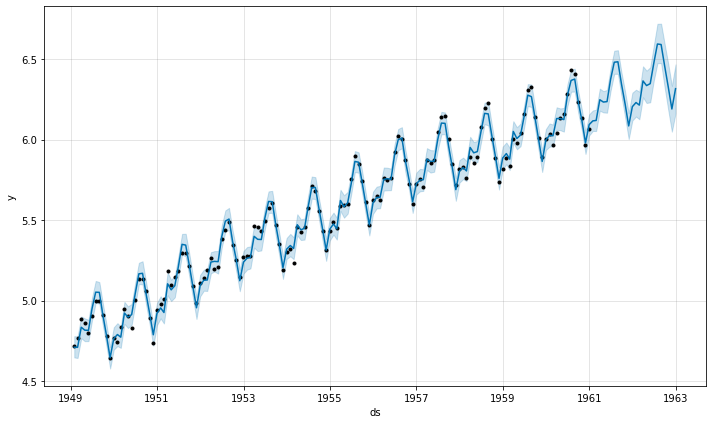

In [0]:
forecast=my_forecast.predict(forecast_periods)
forecast1=forecast.loc[:,['ds','yhat']]
forecast1.head(5)
my_forecast.plot(forecast,uncertainty=True)

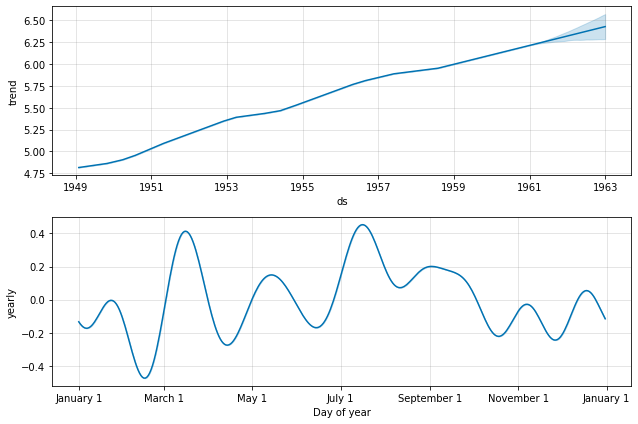

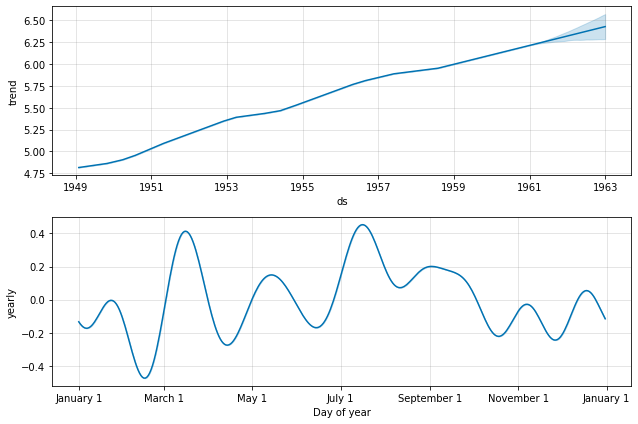

In [0]:
my_forecast.plot_components(forecast)

In [0]:
final_df1=pd.merge(forecast1,fd,on='ds',how='inner')
final_df1.head(5)
final_df1.tail(5)

,ds,yhat,y
0,1949-01-31,4.710721,4.718499
1,1949-02-28,4.709836,4.770685
2,1949-03-31,4.834695,4.882802
3,1949-04-30,4.816443,4.859812
4,1949-05-31,4.815402,4.795791


,ds,yhat,y
139,1960-08-31,6.375592,6.406880
140,1960-09-30,6.233444,6.230481
141,1960-10-31,6.115839,6.133398
142,1960-11-30,5.979623,5.966147
143,1960-12-31,6.092722,6.068426


In [0]:
#CONVERT 'Y' back to original scale
final_df1.yhat=np.e**(final_df1.yhat)
final_df1.y=np.e**(final_df1.y)
final_df1.head(5)
final_df1.tail(5)

,ds,yhat,y
0,1949-01-31,111.132216,112.0
1,1949-02-28,111.033940,118.0
2,1949-03-31,125.800197,132.0
3,1949-04-30,123.524950,129.0
4,1949-05-31,123.396403,121.0


,ds,yhat,y
139,1960-08-31,587.332969,606.0
140,1960-09-30,509.507243,508.0
141,1960-10-31,452.975816,461.0
142,1960-11-30,395.291502,390.0
143,1960-12-31,442.624606,432.0


In [0]:
#compute accuracy of the forecast
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df1.yhat,final_df1.y),0)

7.0

In [0]:
np.round(metrics.median_absolute_error(final_df1.yhat,final_df1.y),0)

5.0

In [0]:
#we can see the converting the variable to log scale to make variance more 
#stable in the original data helped significantly in improving the forecast accuracy
final_df1.head(5)

,ds,yhat,y
0,1949-01-31,111.132216,112.0
1,1949-02-28,111.033940,118.0
2,1949-03-31,125.800197,132.0
3,1949-04-30,123.524950,129.0
4,1949-05-31,123.396403,121.0


In [0]:
final_df1.tail(5)

,ds,yhat,y
139,1960-08-31,587.332969,606.0
140,1960-09-30,509.507243,508.0
141,1960-10-31,452.975816,461.0
142,1960-11-30,395.291502,390.0
143,1960-12-31,442.624606,432.0


In [0]:
#   GENERATE FORECAST VALUES FOR THE NEXT 24 MONTHS ALONG WITH THE 
# 95% CONFIDENCE INTERVAL
forecast2=forecast.loc[144:,['ds','yhat','yhat_lower','yhat_upper']]
forecast2.yhat=np.e**(forecast2.yhat)
forecast2.yhat_lower=np.e**(forecast2.yhat_lower)
forecast2.yhat_upper=np.e**(forecast2.yhat_upper)
np.round(forecast2,0)


,ds,yhat,yhat_lower,yhat_upper
144,1961-01-31,453.0,426.0,483.0
145,1961-02-28,454.0,425.0,486.0
146,1961-03-31,517.0,483.0,553.0
147,1961-04-30,509.0,477.0,545.0
148,1961-05-31,511.0,477.0,549.0
149,1961-06-30,586.0,546.0,627.0
150,1961-07-31,652.0,607.0,701.0
151,1961-08-31,654.0,607.0,702.0
152,1961-09-30,570.0,529.0,612.0
153,1961-10-31,503.0,463.0,543.0


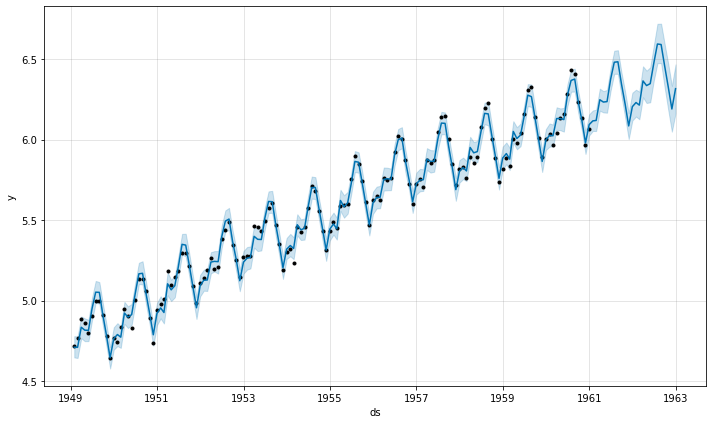

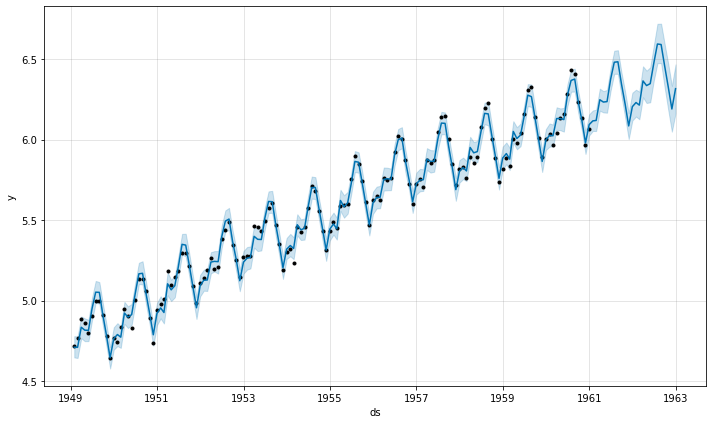

In [0]:
my_forecast.plot(forecast,uncertainty=True)

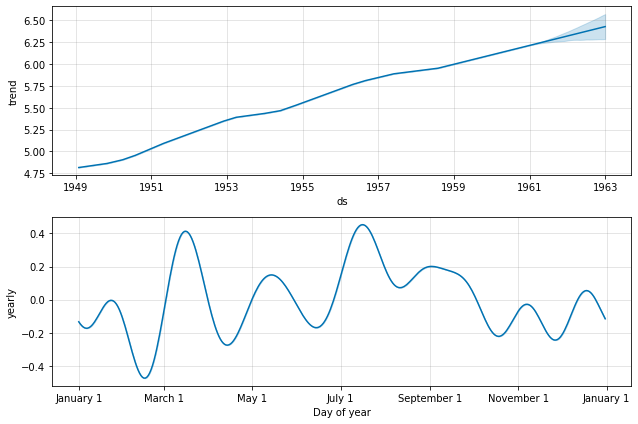

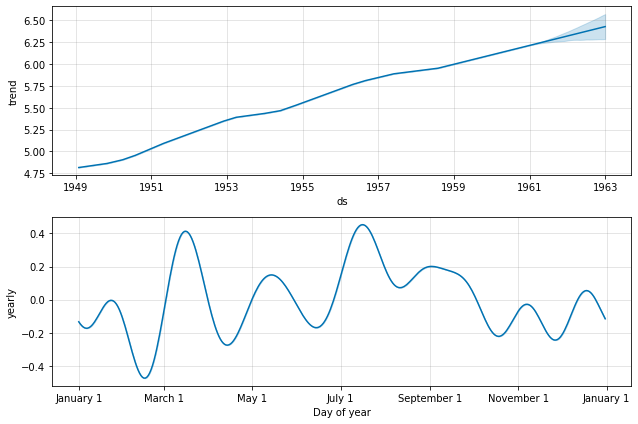

In [0]:
my_forecast.plot_components(forecast)